# 데이터 로드

In [20]:
import json
from glob import glob
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
from konlpy.tag import Kkma
import parmap
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import nltk
from konlpy.corpus import kobill

In [2]:
json_list = [os.path.abspath(i) for i in glob('./2022*.json')]

In [3]:
json_list

['/home/crb123/from113/watson_ko/20220704.json',
 '/home/crb123/from113/watson_ko/20220304.json',
 '/home/crb123/from113/watson_ko/20220804.json',
 '/home/crb123/from113/watson_ko/20220204.json',
 '/home/crb123/from113/watson_ko/20220404.json',
 '/home/crb123/from113/watson_ko/20220604.json',
 '/home/crb123/from113/watson_ko/20220504.json']

In [4]:
t2 = json.load(open('/home/crb123/from113/watson_ko/20220204.json', 'r'))
t3 = json.load(open('/home/crb123/from113/watson_ko/20220304.json', 'r'))
t4 = json.load(open('/home/crb123/from113/watson_ko/20220404.json', 'r'))
t5 = json.load(open('/home/crb123/from113/watson_ko/20220504.json', 'r'))
t6 = json.load(open('/home/crb123/from113/watson_ko/20220604.json', 'r'))
t7 = json.load(open('/home/crb123/from113/watson_ko/20220704.json', 'r'))
t8 = json.load(open('/home/crb123/from113/watson_ko/20220804.json', 'r'))

In [5]:
t7['status_code']

'200'

In [6]:
t8.keys()

dict_keys(['version', 'data_id', 'requests_date', 'response_date', 'status_code', 'data_investing', 'data_kospi'])

In [7]:
len(t8['data_kospi'])

4394

In [8]:
t8['data_kospi'][0]

{'title': "'당신이 소원을 말하면' 길거리 노숙자 성동일, 호스피스 병원 자원봉사자 된 사연은?",
 'url': 'http://www.cabn.kr/news/article.html?no=43829',
 'host': 'cabn.kr',
 'imgurl': 'http://www.cabn.kr/data/photos/adexpo/202208/N16594407544179_e9f07a.jpg',
 'docsent': 'negative',
 'sentscore': '-0.538271',
 'text': "(반려동물뉴스(CABN)) 성동일이 '당신이 소원을 말하면'에서 인생의 희노애락이 담긴 맛깔스런 연기로 예비 시청자들에게 애잔한 눈물과 행복한 웃음을 선사할 예정이다.\nKBS 2TV 새 수목드라마 '당신이 소원을 말하면'은 오는 8월 10일 수요일 밤 9시 50분 첫 방송 예정이며 에이앤이 코리아의 라이프타임에서도 방송된다.\n강태식은 병원의 화장실 휴지통 속사정까지 샅샅이 알고 있는 '팀 지니'의 리더로, 병원에서 삶의 마지막 시간을 보내는 시한부들의 마지막 소원을 들어주는 특별한 봉사활동을 하는 인물이다.\n거침없는 행동과 지나치게 솔직한 성격으로 인해 오해를 사기도 하지만, 대부분의 사람들이 그를 좋아한다.\n노숙자였던 그가 병원에서 자원봉사를 시작하게 된 이유는 무엇일지, 병원부터 경찰서까지 동분서주 하게 된 강태식의 삶을 뒤집어 놓은 사건은 무엇일지 호기심을 한껏 자극한다. '당소말' 제작진은 '성동일은 극 중 강태식의 롤러코스터 같은 인생사를 깊은 연기 내공으로 풀어내며 삶에 대한 묵직한 울림을 선사할 예정이다.\n다수의 작품을 통해 시청자들의 공감을 이끌어왔던 성동일은 섬세한 감정 연기와 변화무쌍한 캐릭터 소화력으로 또 한 번 안방극장을 사로잡을 전망이다.\n또한 양희경, 황차용, 최덕자와 함께 삶의 희노애락을 담은 명연기를 펼치며 안방극장을 유쾌한 웃음과 따스한 감동으로 물들일 테니 많은 관심 부탁드린다'고 전했다.\n성동일은 오는 8월 10일

# 데이터 합치기

In [9]:
dfs = []
for json_path in json_list:
    t = json.load(open(json_path, 'r'))
    tt= pd.DataFrame(t['data_kospi'])
    col = json_path.split('/')[-1].split('.')[0]
    tt['date'] = col
    dfs.append(tt)

concatenated_data = pd.concat(dfs).reset_index(drop=True)

In [10]:
concatenated_data.columns

Index(['title', 'url', 'host', 'imgurl', 'docsent', 'sentscore', 'text',
       'date'],
      dtype='object')

In [11]:
concatenated_data.head(1)

,title,url,host,imgurl,docsent,sentscore,text,date
0,"'시드전 단골' 임진희 ""1년 만에 2승 라이프""…""동력은 연습, 또 연습""",https://ppomppu.co.kr/zboard/view.php?id=news_...,ppomppu.co.kr,https://cdn.ppomppu.co.kr/zboard/data3/hub_new...,neutral,0.0,2018년 가까스로 한국여자프로골프(KLPGA)투어에 진출했지만 상금랭킹 64위에 ...,20220704


In [12]:
concatenated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4109 entries, 0 to 4108
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      4109 non-null   object
 1   url        4109 non-null   object
 2   host       4109 non-null   object
 3   imgurl     4109 non-null   object
 4   docsent    4109 non-null   object
 5   sentscore  4109 non-null   object
 6   text       4109 non-null   object
 7   date       4109 non-null   object
dtypes: object(8)
memory usage: 256.9+ KB


In [13]:
concatenated_data.describe()

,title,url,host,imgurl,docsent,sentscore,text,date
count,4109,4109,4109,4109,4109,4109,4109,4109
unique,4082,4109,617,3718,3,1166,3914,7
top,[표] 투자자별 매매동향(3일) | 연합뉴스,https://ppomppu.co.kr/zboard/view.php?id=news_...,newspeak.kr,https://www.tfmedia.co.kr/data/design/logo/def...,neutral,0.0,,20220504
freq,3,1,338,55,2928,2928,155,775


In [14]:
concatenated_data['docsent'].value_counts()

neutral     2928
positive     913
negative     268
Name: docsent, dtype: int64

- docsent > 0 : positive
- docsent = 0 : neutral
- docsent < 0 : negative

# konlpy, JPype1 설치

- pip install JPype1
- pip3 install konlpy

In [7]:
from konlpy.tag import Kkma

Kkma().pos('나는 사과가 좋다.')

[('나', 'VV'),
 ('는', 'ETD'),
 ('사과', 'NNG'),
 ('가', 'JKS'),
 ('좋', 'VA'),
 ('다', 'EFN'),
 ('.', 'SF')]

In [7]:
from konlpy.tag import Kkma

kkma = Kkma()
text = "꼬꼬마 형태소 분석기를 사용하는 예시입니다."
nouns = kkma.nouns(text)
morphs = kkma.morphs(text)
pos_tags = kkma.pos(text)

print("명사:", nouns)
print("형태소:", morphs)
print("품사 태깅:", pos_tags)

명사: ['꼬꼬마', '형태소', '분석기', '사용', '예시']
형태소: ['꼬꼬마', '형태소', '분석기', '를', '사용', '하', '는', '예시', '이', 'ㅂ니다', '.']
품사 태깅: [('꼬꼬마', 'NNG'), ('형태소', 'NNG'), ('분석기', 'NNG'), ('를', 'JKO'), ('사용', 'NNG'), ('하', 'XSV'), ('는', 'ETD'), ('예시', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [8]:
concatenated_data['text'][0]

'IBK기업은행(은행장 윤종원)은 열악한 학습 환경 속에서도 학업에 매진하고 있는 중소기업 근로자 및 소상공인 자녀 517명에게 장학금 10억 2400만원을 전달했다고 3일 밝혔다.\n또 금융권 최초 중소기업 공동 직장 어린이집 설립, 멘토링, 금융경제교육 등 다양한 사회공헌 활동을 통해 중소기업 근로자를 꾸준히 지원하고 있다.\n또 장학생으로 선발된 대학생들이 향후 소외계층 아동들에게 학습지도 봉사활동을 하는 \'IBK멘토링\'에 참여하는 등 나눔의 의미가 확산될 수 있는 기회도 마련했다.\n장학금 후원에는 장학생의 가족이 근무하는 기업도 참여해 나눔의 의미를 더했다고 은행 측은 전했다.\n장학생으로 선발된 김지영(가명, 19)양은 "저를 포함한 자녀 3명의 교육비 때문에 허리가 휘도록 일하시는 부모님께 죄송했는데 기업은행의 장학금 지원으로 교육비 부담을 덜게 되어 감사하다 고 말했다.\n최성민(가명, 24)군은 "경영학과 컴퓨터공학을 복수 전공하는 동시에 스타트업의 근로자로서 새로운 도전에 대한 두려움도 있었지만 기업은행의 장학금 수혜로 할 수 있다는 용기를 얻었다 며 감사의 인사를 전했다.\n한편, 기업은행은 중소기업 근로자 가족의 복지향상을 위해 지난 2006년 IBK행복나눔재단을 설립해 총 615억원을 출연했으며 지금까지 장학금 179억원, 치료비 130억원 등을 후원했다.'

- 키워드 추출을 위해 konlpy와 tf-idf를 사용하여 키워드를 추출하는 방법

In [134]:
from konlpy.tag import Kkma
from sklearn.feature_extraction.text import TfidfVectorizer

kkma = Kkma()
text = concatenated_data['text'][0]

# 문장에서 명사 추출
nouns = kkma.nouns(text)

# 명사 리스트를 공백으로 구분된 문자열로 변환
document = ' '.join(nouns)

# TfidfVectorizer를 사용하여 tf-idf 행렬 생성
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([document])

# 각 단어의 이름과 해당하는 tf-idf 값 출력
keywords = vectorizer.get_feature_names()
tfidf_scores = tfidf_matrix.toarray()[0]

# tf-idf 값이 높은 순서대로 키워드 추출
top_keywords = [keywords[i] for i in tfidf_scores.argsort()[::-1][:20]]
top_tfidf_scores = [tfidf_scores[i] for i in tfidf_scores.argsort()[::-1][:20]]

print("키워드 추출 결과:")
for keyword, score in zip(top_keywords, top_tfidf_scores):
    print(f"{keyword}: {score}")


키워드 추출 결과:
후원: 0.0949157995752499
다양: 0.0949157995752499
교육비: 0.0949157995752499
근로자: 0.0949157995752499
근무: 0.0949157995752499
금융: 0.0949157995752499
금융경제교육: 0.0949157995752499
금융권: 0.0949157995752499
기업: 0.0949157995752499
기업은행: 0.0949157995752499
기회: 0.0949157995752499
김지영: 0.0949157995752499
나눔: 0.0949157995752499
대학생: 0.0949157995752499
공헌: 0.0949157995752499
도전: 0.0949157995752499
동시: 0.0949157995752499
두려움: 0.0949157995752499
때문: 0.0949157995752499
마련: 0.0949157995752499


# KNU 사전 검색 클래스

In [152]:
class KnuSL():

    def data_list(wordname):
        with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
            data = json.load(f)
        result = ['None','None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])

        r_word = result[0]
        s_word = result[1]
        print('어근 : ' + r_word)
        print('극성 : ' + s_word)

        return r_word, s_word

ksl = KnuSL

print("\nKNU 한국어 감성사전입니다~ :)")
print("사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!")
print("종료하시려면 #을 입력해주세요!!!")
print("-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정")
print("\n")

while(True):
    wordname = input("word : ")
    wordname = wordname.strip(" ")
    if wordname != "#":
        print(ksl.data_list(wordname))
        print("\n")


    elif wordname == "#":
        print("\n이용해주셔서 감사합니다~ :)")
        break


KNU 한국어 감성사전입니다~ :)
사전에 단어가 없는 경우 결과가 None으로 나타납니다!!!
종료하시려면 #을 입력해주세요!!!
-2:매우 부정, -1:부정, 0:중립 or Unkwon, 1:긍정, 2:매우 긍정


word : 좋아요
어근 : None
극성 : None
('None', 'None')


word : 좋아
어근 : 좋아
극성 : 2
('좋아', '2')


word : 좋아하지 않아
어근 : None
극성 : None
('None', 'None')


word : 좋아해
어근 : 좋아하
극성 : 2
('좋아하', '2')


word : 좋아하지\
어근 : None
극성 : None
('None', 'None')


word : 좋아하지
어근 : None
극성 : None
('None', 'None')


word : 좋았다
어근 : None
극성 : None
('None', 'None')


word : 좋았습니다
어근 : None
극성 : None
('None', 'None')


word : #

이용해주셔서 감사합니다~ :)


In [45]:
concatenated_data

(4109, 8)

In [43]:
reviews = concatenated_data['text'][0].split('\n')

In [44]:
reviews

['2018년 가까스로 한국여자프로골프(KLPGA)투어에 진출했지만 상금랭킹 64위에 그쳐 시드전에서 기사회생했고, 2019년 상금랭킹 84위로 2020년 결국 드림투어를 전전했다.',
 '3일 강원도 평창 버치힐골프장(파72ㆍ6434야드)에서 끝난 한국여자프로골프(KLPGA)투어 맥콜ㆍ모나파크오픈(총상금 8억원) 최종일 3언더파를 보태 2타 차 우승(11언더파 205타)을 찍었다.',
 '[아시아경제 김현준 골프전문기자] "연습, 또 연습." \'시드전 단골\' 임진희(24)가 불과 1년 만에 \'2승 고지\'에 올랐다.',
 '보통 초등학교 5 ,6학년 때부터 대회에 나서지만 고등학교에 입학하면서 본격적으로 골프를 배워 입문부터 늦었다.',
 '시즌 첫 승이자 통산 2승째, 사흘내내 선두를 달려 남다른 파워까지 곁들였다.',
 "올 시즌 11경기에서 '톱 10' 진입 네 차례 등 신바람을 냈고, 이번 대회 역시 1라운드 5언더파 선두로 일찌감치 승기를 잡았다.",
 '윤이나는 2위(9언더파 207타)에 만족했다.',
 "임진희가 최종일 윤이나(19)의 9~12번홀 4연속버디 추격전에 10, 12번홀 '징검다리 버디'로 맞서는 등 '강철 멘털'을 과시했다는 게 흥미롭다.",
 "임진희는 '국내 넘버 1' 박민지(24)와 동갑이지만 국가대표 등 화려한 엘리트 코스를 거친 선수들과 달리 '흙길'을 걸은 선수다.",
 '임진희에게 \'시드전 단골\'이라는 달갑지 않은 애칭이 붙은 이유다. "아침에 눈 뜨면 무조건 연습하러 가서 해가 져야 집으로 돌아왔다"며 "늦은 만큼 연습량은 많을 수 밖에 없었다"고 소개했다.',
 '지난해 6월 마침내 BC카드ㆍ한경레이디스컵을 제패했고, 앞선 9개 대회에서 다섯 차례나 \'컷 오프\'를 당해 더욱 스포트라이트가 쏟아졌다. "갑작스러운 손목 부상에 발목이 잡혔다"는 설명이다.']

- 형태소로 추출 후 토큰화

In [11]:
kkma = Kkma()
# morphs = kkma.morphs(text)

tokens = [kkma.morphs(word) for word in reviews]
tokens = list(map(lambda x : " ".join(x), tokens))
tokens

['2018 년 가까스로 한국 여자 프로 골프 ( KLPGA ) 투어 에 진출 하 었 지만 상금 랭킹 64 위 에 그치 어 시드 전 에서 기사 회생 하 었 고 , 2019 년 상금 랭킹 84 위 로 2020 년 결국 드림 투어 를 전전 하 었 다 .',
 '3 일 강원 도 평 창 버치 힐 골프장 ( 파 72 ㆍ 6434 야드 ) 에서 끝나 ㄴ 한국 여자 프로 골프 ( KLPGA ) 투어 맥 콜 ㆍ 몰 나 파크 오픈 ( 총상 금 8 억 원 ) 최종일 3 언더파 를 보태 2 타 차 우승 ( 11 언더파 205 타 ) 을 찍 었 다 .',
 '[ 아시아 경제 김 현준 골프 전문 기자 ] " 연습 , 또 연습 . " \' 시드 전 단골 \' 임 진희 ( 24 ) 가 아 불과 1 년 만 에 \' 2 승 고지 \' 에 오르 았 다 .',
 '보통 초등학교 5 , 6 학년 때 부터 대회 에 나서 지만 고등학교 에 입학 하 면서 본격적 으로 골프 를 배우 어 입문 부터 늦 었 다 .',
 '시즌 첫 승 이자 통산 2 승 째 , 사흘 내내 선두 를 달리 어 남다르 ㄴ 파워 까지 곁들이 었 다 .',
 "올 시즌 11 경기 에서 ' 톱 10 ' 진입 네 차례 등 신바람 을 내 었 고 , 이번 대회 역시 1 라운드 5 언더파 선두 로 일찌감치 승기 를 잡 았 다 .",
 '윤 이 나 는 2 위 ( 9 언더파 207 타 ) 에 만족 하 었 다 .',
 "임 진희 가 아 최종일 윤 이나 ( 19 ) 의 9 ~ 12 번 홀 4 연속 버디 추격전 에 10 , 12 번 홀 ' 징검다리 버디 ' 로 맞서 는 등 ' 강철 메 ㄴ 털 ' 을 과시 하 었 다는 것 이 흥미 롭 다 .",
 "임진 희 는 ' 국내 넘버 1 ' 박 민지 ( 24 ) 오 아 동갑 이 지만 국가 대표 등 화려 하 ㄴ 엘리트 코스 를 거치 ㄴ 선수 들 과 달리 ' 흙 길 ' 을 걷 은 선수 이 다 .",
 '임 진희 에 게 \' 시드 전 단골 \' 이 라는 달갑 지 않 은 애칭 이 붙 은 이유 이 다 . " 아침 에 눈 

In [14]:
# 명사로 추출 후 토큰화
# kkma = Kkma()

# tokens = [kkma.nouns(word) for word in reviews]
# tokens = list(map(lambda x : " ".join(x), tokens))
# tokens

- KNU언어사전 불러오기

In [12]:
with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f: 
    SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)

In [19]:
sentiword_dic

,word,word_root,polarity
0,(-;,(,1
1,(;_;),(;_;),-1
2,(^^),(^^),1
3,(^-^),(^-^),1
4,(^^*,(,1
...,...,...,...
14849,반신반의하다,반신반의,0
14850,신비롭다,신비,1
14851,아리송하다,아리송,-1
14852,알쏭하다,알쏭하,-1


In [13]:
def news_to_score(text):
    lines = text.split('\n')
    
    kkma = Kkma()
    tokens = [kkma.morphs(line) for line in lines]
    tokens = list(map(lambda x : " ".join(x), tokens))
    
    sentiment = 0                                     # 초기 감성값 0으로 설정   
    for token in tokens:                                # 전체에서 문장 하나씩 가져옴 
        for i in range(0, len(sentiword_dic)):            # 감성사전의 모든 단어를 하나씩 선택
            if sentiword_dic.word[i] in token:              # 문장에 감성 단어가 있는지 확인
                sentiment += int(sentiword_dic.polarity[i])   # 감성단어가 있다면 극성값 합계를 구함.

    return sentiment

In [17]:
# def news_to_score_df(df):
#     df = df.reset_index(drop=True)
    
#     for i in df.index:

#         row = df.iloc[i, :]
#         txt = row['text']

#         lines = txt.split('\n')

#         kkma = Kkma()
#         tokens = [kkma.morphs(line) for line in lines]
#         tokens = list(map(lambda x : " ".join(x), tokens))

#         sentiment = 0                                     # 초기 감성값 0으로 설정   
#         for token in tokens:                                # 전체에서 문장 하나씩 가져옴 
#             for i in range(0, len(sentiword_dic)):            # 감성사전의 모든 단어를 하나씩 선택
#                 if sentiword_dic.word[i] in token:              # 문장에 감성 단어가 있는지 확인
#                     sentiment += int(sentiword_dic.polarity[i])   # 감성단어가 있다면 극성값 합계를 구함.
                             
#         df._set_value(i, 'my_score', sentiment)
#     return df


# res = parmap.map(
#     review_to_score_df,
#     df_split,
#     pm_pbar=True,
#     pm_processes=2,
# )

# df_res = pd.concat(res)
# df_res = df_res.reset_index(drop=True)


In [15]:
from tqdm import tqdm
tqdm.pandas()

In [16]:
df_split = np.array_split(concatenated_data, 100)

In [17]:
len(df_split)

100

# 감정 스코어 추출

In [18]:
for s in range(len(df_split)):
    df = df_split[s]
    for i in tqdm(df.index, total=len(df)):
        try:
            text = df.at[i, 'text']
            score = news_to_score(text)
    #         print(score)
            df.at[i, 'my_score'] = score
        except:
            df.at[i, 'my_score'] = None
    df.to_csv(f'./Data/dfkospi_{s}.csv', index=False)

100%|██████████| 41/41 [00:44<00:00,  1.10s/it]


In [54]:
csvlist = [os.path.abspath(i) for i in glob('./Data/dfkospi_*')]

In [55]:
dfs = []
for e in csvlist:
    t = pd.read_csv(e)
    dfs.append(t)

concatdata = pd.concat(dfs).reset_index(drop=True)
concatdata

,title,url,host,imgurl,docsent,sentscore,text,date,my_score
0,"인천 미추홀구 관교노인복지관, '제2회 승학골 축제' 진행",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,가정의 달 기념 [뉴스피크] 사단법인 온세상나눔재단에서 위탁 운영하는 관교노인복지관...,20220504,3.0
1,"인천 미추홀구 숭의종합사회복지관, 위드어스 예술단과 업무협약",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 숭의종합사회복지관과 위드어스 예술단은 주민 문화예술 복지서비스 지원을 ...,20220504,-3.0
2,"인천 부평구 부평1동 마을복지추진단, 옥상 텃밭에 모종심어 나눔 시작",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평1동 마을복지추진단은 지난 2일 동 행정복지센터 옥상 ...,20220504,5.0
3,"인천 부평구 부평3동 주민자치회, 선진지 벤치마킹 워크숍 진행",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평3동 주민자치회는 지난달 29일 충남 태안군 원북면 주...,20220504,7.0
4,"인천 부평구 부평3동, 주식회사 모이세로부터 라면 기부 받아",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평3동은 지난 2일 주식회사 모이세로부터 라면 50박스를...,20220504,-5.0
...,...,...,...,...,...,...,...,...,...
4104,"포항시, '천하제일 일출비경 신창리 일출암'서 작은 식목일 행사 개최",https://news.korea.com/newsView/2022040362496b...,news.korea.com,https://www.gukjenews.com/news/photo/202204/24...,neutral,0.000000,(포항=국제뉴스) 강동진 기자 = 포항시는 1일 제77회 식목일을 앞두고 '소소한 ...,20220404,5.0
4105,"한가인, '1박2일' 멤버들 활약 직관에 팩폭 ""답답하네 진짜!""",https://www.asiatoday.co.kr/view.php?key=20220...,asiatoday.co.kr,https://img.asiatoday.co.kr/file/2022y/04m/03d...,positive,0.843079,"2일 선거사무소 개소식 열어 러 침략군, 우크라 수도 키이우서 철수, 동부-남부 투입..",20220404,0.0
4106,한국 IT기업들만 바보된 기분… 서방 IT기업과 러의 간교한 '밀월' [DD 인사이트],https://www.ddaily.co.kr/news/article.html?no=...,ddaily.co.kr,https://www.ddaily.co.kr/data/photos/cdn/20220...,negative,-0.734632,2차 세계대전 당시 IBM이 나치에 키 펀칭 기계를 활용한 데이터 처리 기술을 제공...,20220404,-31.0
4107,"한국, 카타르월드컵 H조 편성…최악은 면했지만",http://www.mooye.net/19521,mooye.net,https://f.xza.co.kr/http://www.mooye.net/data/...,negative,-0.907750,E조는 일본이 스페인-독일과 함께 속해있다.\nFIFA(국제축구연맹) 랭킹 29위인...,20220404,-9.0


# 감정 스코어 -1 ~1 정규화

In [56]:
# A 컬럼의 최솟값과 최댓값 구하기
min_value = concatdata['my_score'].min()
max_value = concatdata['my_score'].max()

# 정규화 수식을 이용하여 A 컬럼의 값을 -1부터 1까지로 변환
concatdata['my_score_normalized'] = (concatdata['my_score'] - min_value) / (max_value - min_value) * 2 - 1
concatdata

,title,url,host,imgurl,docsent,sentscore,text,date,my_score,my_score_normalized
0,"인천 미추홀구 관교노인복지관, '제2회 승학골 축제' 진행",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,가정의 달 기념 [뉴스피크] 사단법인 온세상나눔재단에서 위탁 운영하는 관교노인복지관...,20220504,3.0,0.094595
1,"인천 미추홀구 숭의종합사회복지관, 위드어스 예술단과 업무협약",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 숭의종합사회복지관과 위드어스 예술단은 주민 문화예술 복지서비스 지원을 ...,20220504,-3.0,0.013514
2,"인천 부평구 부평1동 마을복지추진단, 옥상 텃밭에 모종심어 나눔 시작",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평1동 마을복지추진단은 지난 2일 동 행정복지센터 옥상 ...,20220504,5.0,0.121622
3,"인천 부평구 부평3동 주민자치회, 선진지 벤치마킹 워크숍 진행",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평3동 주민자치회는 지난달 29일 충남 태안군 원북면 주...,20220504,7.0,0.148649
4,"인천 부평구 부평3동, 주식회사 모이세로부터 라면 기부 받아",http://www.newspeak.kr/news/articleView.html?i...,newspeak.kr,http://www.newspeak.kr/news/thumbnail/202205/4...,neutral,0.000000,[뉴스피크] 인천 부평구 부평3동은 지난 2일 주식회사 모이세로부터 라면 50박스를...,20220504,-5.0,-0.013514
...,...,...,...,...,...,...,...,...,...,...
4104,"포항시, '천하제일 일출비경 신창리 일출암'서 작은 식목일 행사 개최",https://news.korea.com/newsView/2022040362496b...,news.korea.com,https://www.gukjenews.com/news/photo/202204/24...,neutral,0.000000,(포항=국제뉴스) 강동진 기자 = 포항시는 1일 제77회 식목일을 앞두고 '소소한 ...,20220404,5.0,0.121622
4105,"한가인, '1박2일' 멤버들 활약 직관에 팩폭 ""답답하네 진짜!""",https://www.asiatoday.co.kr/view.php?key=20220...,asiatoday.co.kr,https://img.asiatoday.co.kr/file/2022y/04m/03d...,positive,0.843079,"2일 선거사무소 개소식 열어 러 침략군, 우크라 수도 키이우서 철수, 동부-남부 투입..",20220404,0.0,0.054054
4106,한국 IT기업들만 바보된 기분… 서방 IT기업과 러의 간교한 '밀월' [DD 인사이트],https://www.ddaily.co.kr/news/article.html?no=...,ddaily.co.kr,https://www.ddaily.co.kr/data/photos/cdn/20220...,negative,-0.734632,2차 세계대전 당시 IBM이 나치에 키 펀칭 기계를 활용한 데이터 처리 기술을 제공...,20220404,-31.0,-0.364865
4107,"한국, 카타르월드컵 H조 편성…최악은 면했지만",http://www.mooye.net/19521,mooye.net,https://f.xza.co.kr/http://www.mooye.net/data/...,negative,-0.907750,E조는 일본이 스페인-독일과 함께 속해있다.\nFIFA(국제축구연맹) 랭킹 29위인...,20220404,-9.0,-0.067568


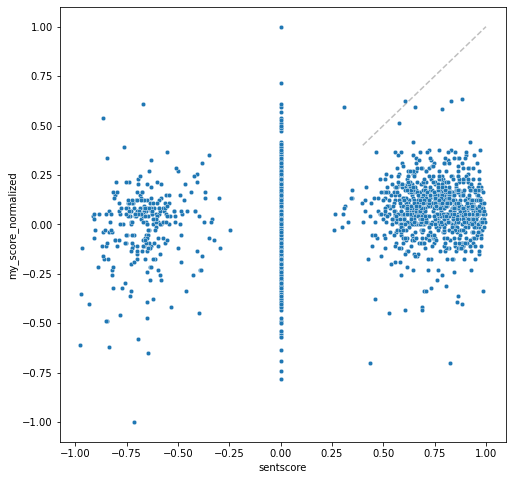

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.scatterplot(data=concatdata, x='sentscore', y='my_score_normalized', s=20)
plt.plot([0.4,1], [0.4,1], ls='--', alpha=0.5, color='grey')

- nan제거

In [58]:
concatdata1 = concatdata[~concatdata['text'].isna()].reset_index(drop=True)

In [60]:
concatdata1.shape

(3954, 10)

# summa 라이브러리 이용해서 문장 추출적 요약

In [61]:
from summa.summarizer import summarize

def summarize_text(text, word_limit=50):
    words = text.split()
    ratio = word_limit / len(words)
    return summarize(text, ratio)

In [62]:
for i in tqdm(concatdata1.index, total=len(concatdata1)):
    text = concatdata1.at[i, 'text']
    summar = summarize_text(text)
    concatdata1.at[i, 'summarize'] = summar

100%|██████████| 3954/3954 [00:13<00:00, 297.64it/s]


In [128]:
concatdata1[['summarize']]

,summarize
0,가정의 달 기념 [뉴스피크] 사단법인 온세상나눔재단에서 위탁 운영하는 관교노인복지관...
1,[뉴스피크] 숭의종합사회복지관과 위드어스 예술단은 주민 문화예술 복지서비스 지원을 ...
2,"이날 부평1동 마을복지추진단은 땅콩, 총각무 등 친환경 채소 모종을 심었으며 수확물..."
3,[뉴스피크] 인천 부평구 부평3동 주민자치회는 지난달 29일 충남 태안군 원북면 주...
4,[뉴스피크] 인천 부평구 부평3동은 지난 2일 주식회사 모이세로부터 라면 50박스를...
...,...
3949,(포항=국제뉴스) 강동진 기자 = 포항시는 1일 제77회 식목일을 앞두고 '소소한 ...
3950,
3951,"'비우호국' 지정된 한국, 기업들은 그대로 리스크 노출 정말 이런 의혹이 사실이라면..."
3952,"FIFA(국제축구연맹) 랭킹 29위인 한국은 포르투갈(8위), 우루과이(13위), ..."


# gensim라이브러리 사용해서 토픽 모델링(LDA)

In [63]:
# 필요한 라이브러리를 가져옵니다.
import gensim
from gensim import corpora
from gensim.models import LdaModel
from konlpy.tag import Okt

# 문장을 입력받아 토픽 모델링을 수행하는 함수를 정의합니다.
def topic_modeling(text):
    # Okt 형태소 분석기를 사용하여 문장을 토큰화합니다.
    okt = Okt()
    tokens = okt.nouns(text)

    # 토큰화된 문장을 바탕으로 사전을 생성합니다.
    dictionary = corpora.Dictionary([tokens])

    # 사전을 바탕으로 문서-단어 행렬을 생성합니다.
    corpus = [dictionary.doc2bow(token) for token in [tokens]]

    # LDA 모델을 학습시킵니다.
    lda_model = LdaModel(corpus, num_topics=1, id2word=dictionary)

    # 학습된 모델을 바탕으로 주제를 추출합니다.
    topics = lda_model.print_topics(num_words=5)

    return topics[0][1]

In [64]:
import re

def extract_words(text):
    pattern = r'\"(.+?)\"'
    words = re.findall(pattern, text)
    return words

- 0.025*"장학금" + 0.021*"근로자" + 0.021*"중소기업" + 0.021*"기업은행" + 0.017*"나눔" 식으로 나오면 단어만 추출하도록 하기

In [65]:
from tqdm import tqdm

# 'topics' 컬럼 초기화
concatdata1['topics'] = None

for i in tqdm(range(len(concatdata1)), desc='Processing'):
    text = concatdata1.at[i, 'text']
    topics = topic_modeling(text)
    topics = extract_words(topics)
    concatdata1.at[i, 'topics'] = topics

Processing: 100%|██████████| 3954/3954 [01:54<00:00, 34.67it/s]


In [127]:
concatdata1[['topics']]

,topics
0,"[복지관, 노인, 진행, 행사, 관교]"
1,"[예술, 어스, 종합, 협약, 단]"
2,"[이웃, 복지, 부평, 텃밭, 추진단]"
3,"[자치, 주민, 회, 원북면, 부평]"
4,"[이웃, 주식회사, 지역, 라면, 고]"
...,...
3949,"[일출, 암, 창, 행사, 나무]"
3950,"[남부, 침략, 철수, 키이우, 사무소]"
3951,"[기업, 러시아, 이, 서방, 철수]"
3952,"[조, 한국, 팀, 우루과이, 포르투갈]"


# 워드 클라우드

- 월별로 토픽 모음

In [82]:
tmp_df = pd.DataFrame(concatdata1.groupby('date')['topics'].sum())
tmp_df

,topics
date,
20220204,"[명절, 전달, 참여, 봉사, 나눔, 블로그, 자단, 여주시, 여주, 관광, 정비,..."
20220304,"[거래, 종목, 상승, 대비, 전, 재무, 분석, 상세, 보기, 영역, 분석, 보기..."
20220404,"[이승우, 수원, 골, 리그, 성남, 손흥민, 토트넘, 매치, 소화, 경기, 경기,..."
20220504,"[복지관, 노인, 진행, 행사, 관교, 예술, 어스, 종합, 협약, 단, 이웃, 복..."
20220604,"[글로벌, 청담, 오른, 첨단, 영역, 글로벌, 청담, 장, 공모, 날, 글로벌, ..."
20220704,"[센터, 젤리, 컬, 세계, 복음주의, 독립유공자, 호, 션, 집, 정, 대금, 평..."
20220804,"[종목, 상승, 개, 크라운, 기록, 종목, 개, 상승, 보이, 하락, 종목, 개,..."


In [88]:
tmp_df['topics'].values[0]

['명절',
 '전달',
 '참여',
 '봉사',
 '나눔',
 '블로그',
 '자단',
 '여주시',
 '여주',
 '관광',
 '정비',
 '등산로',
 '등',
 '등산',
 '것',
 '인종',
 '것',
 '교육',
 '이론',
 '비판',
 '지수',
 '수익률',
 '상품',
 '추종',
 '레버리지',
 '증권',
 '크게',
 '자금',
 '이후',
 '개인',
 '개',
 '금메달',
 '남자',
 '회전',
 '여자',
 '종목',
 '거래',
 '적',
 '등',
 '폭',
 '겨울',
 '마을',
 '수',
 '곳',
 '청수',
 '공유',
 '분',
 '폰트',
 '단계',
 '인수',
 '표',
 '채석장',
 '산업',
 '매몰',
 '멘트',
 '표',
 '채석장',
 '산업',
 '매몰',
 '멘트',
 '공유',
 '폰트',
 '단계',
 '김해시',
 '해',
 '공감',
 '소통',
 '찾기',
 '투데이',
 '교육지원청',
 '캐디',
 '앱',
 '공유',
 '등',
 '골프',
 '선수',
 '베이징',
 '훈련',
 '쇼트트랙',
 '서로',
 '원',
 '증권',
 '규모',
 '최대',
 '동안',
 '증권',
 '성장',
 '기준',
 '영업',
 '실적',
 '개월',
 '지수',
 '연',
 '상환',
 '만기',
 '환경',
 '투기',
 '정화',
 '교통',
 '무단',
 '설',
 '대장',
 '남양주시',
 '코로나',
 '변',
 '안',
 '부분',
 '음량',
 '전면',
 '게',
 '메이크업',
 '연출',
 '음영',
 '컬러',
 '매트',
 '거래',
 '일',
 '코스닥시장',
 '오른',
 '증시',
 '포인트',
 '지수',
 '등',
 '증권',
 '거래',
 '포인트',
 '코스닥',
 '출발',
 '코스피',
 '연합뉴스',
 '등',
 '상승',
 '거래',
 '주',
 '바이오',
 '지수',
 '거래',
 '상승',
 '일',
 '전자',
 '금융시장',
 '코스피

In [89]:
tmp_df['topics'].values[2]

['이승우',
 '수원',
 '골',
 '리그',
 '성남',
 '손흥민',
 '토트넘',
 '매치',
 '소화',
 '경기',
 '경기',
 '선수',
 '가스',
 '공사',
 '플레이오프',
 '염태영',
 '경기도',
 '지사',
 '예비',
 '후보',
 '음식',
 '이상민',
 '로컬',
 '미나리',
 '광주',
 '사운드',
 '삼성',
 '바',
 '디자인',
 '수',
 '국무총리',
 '후보자',
 '당선인',
 '정부',
 '적임',
 '정부',
 '경제',
 '후보자',
 '국무총리',
 '당선인',
 '후보자',
 '경제',
 '정부',
 '역임',
 '국무총리',
 '총리',
 '국무총리',
 '전',
 '지명',
 '후보자',
 '정부',
 '경제',
 '국무총리',
 '총리',
 '후보자',
 '명',
 '후보자',
 '경제',
 '정부',
 '국회',
 '정부',
 '경제',
 '당선인',
 '후보자',
 '총리',
 '플라이',
 '비트',
 '매각',
 '것',
 '화폐',
 '복지',
 '강남구',
 '회',
 '기관',
 '주민',
 '강남구',
 '회',
 '기관',
 '복지',
 '스마트',
 '브랜드',
 '구매',
 '핸드',
 '갤러리아',
 '프리미엄',
 '상장폐지',
 '감사',
 '곳',
 '등',
 '지정',
 '상장폐지',
 '의견',
 '감사',
 '곳',
 '사유',
 '개사',
 '상장폐지',
 '지정',
 '사유',
 '신규',
 '피해',
 '불법',
 '등',
 '사금융',
 '곳',
 '투자',
 '유치',
 '사업',
 '군',
 '서비스',
 '공동체',
 '사업',
 '경기도',
 '아동',
 '공간',
 '경기',
 '평화',
 '광장',
 '도민',
 '등',
 '감사',
 '등',
 '대한',
 '운영',
 '제도',
 '게임',
 '플레이',
 '참여',
 '엑스포',
 '등',
 '관광',
 '대상',
 '업체',
 '지급',
 '사업자',
 '지원',
 '과정',
 '취업

- 워드클라우드

In [143]:
# 빈도수 처리
m2= tmp_df['topics'].values[0]
ko = nltk.Text(m2, name='2월')
ko

<Text: 2월>

In [142]:
m2

['명절',
 '전달',
 '참여',
 '봉사',
 '나눔',
 '블로그',
 '자단',
 '여주시',
 '여주',
 '관광',
 '정비',
 '등산로',
 '등',
 '등산',
 '것',
 '인종',
 '것',
 '교육',
 '이론',
 '비판',
 '지수',
 '수익률',
 '상품',
 '추종',
 '레버리지',
 '증권',
 '크게',
 '자금',
 '이후',
 '개인',
 '개',
 '금메달',
 '남자',
 '회전',
 '여자',
 '종목',
 '거래',
 '적',
 '등',
 '폭',
 '겨울',
 '마을',
 '수',
 '곳',
 '청수',
 '공유',
 '분',
 '폰트',
 '단계',
 '인수',
 '표',
 '채석장',
 '산업',
 '매몰',
 '멘트',
 '표',
 '채석장',
 '산업',
 '매몰',
 '멘트',
 '공유',
 '폰트',
 '단계',
 '김해시',
 '해',
 '공감',
 '소통',
 '찾기',
 '투데이',
 '교육지원청',
 '캐디',
 '앱',
 '공유',
 '등',
 '골프',
 '선수',
 '베이징',
 '훈련',
 '쇼트트랙',
 '서로',
 '원',
 '증권',
 '규모',
 '최대',
 '동안',
 '증권',
 '성장',
 '기준',
 '영업',
 '실적',
 '개월',
 '지수',
 '연',
 '상환',
 '만기',
 '환경',
 '투기',
 '정화',
 '교통',
 '무단',
 '설',
 '대장',
 '남양주시',
 '코로나',
 '변',
 '안',
 '부분',
 '음량',
 '전면',
 '게',
 '메이크업',
 '연출',
 '음영',
 '컬러',
 '매트',
 '거래',
 '일',
 '코스닥시장',
 '오른',
 '증시',
 '포인트',
 '지수',
 '등',
 '증권',
 '거래',
 '포인트',
 '코스닥',
 '출발',
 '코스피',
 '연합뉴스',
 '등',
 '상승',
 '거래',
 '주',
 '바이오',
 '지수',
 '거래',
 '상승',
 '일',
 '전자',
 '금융시장',
 '코스피

In [144]:
# returns number of tokens (document length)
print(len(ko.tokens))

3349


In [145]:
# returns number of unique tokens (중복값을 뺀 토큰 수)
# set : 중복이 없는 집합함수 뽑아주는 메서드

print(len(set(ko.tokens)))

1203


In [146]:
# 빈도수로 정리
# returns frequency distribution

ko.vocab()

FreqDist({'거래': 102, '등': 77, '상승': 69, '수': 51, '것': 48, '코스피': 46, '올림픽': 32, '종목': 29, '지수': 28, '베이징': 27, ...})

In [153]:
# 불용어 처리
stop_words = ['.', '(', ')', ',', "'", '%', '-', 'X', ').', '×','의','자','에','안','번','호','을','이','다','만','로','가','를', '것','등']

In [158]:
my_dict = dict(ko.vocab())

# 특정 키를 제거하는 함수
def remove_key(dictionary, key):
    for k in key:
        if k in dictionary:
            del dictionary[k]

# 'key2'를 제거
remove_key(my_dict, stop_words)

# print(my_dict)

In [163]:
# 딕셔너리 값을 기준으로 정렬된 튜플 리스트 생성
sorted_tuples = sorted(my_dict.items(), key=lambda x: x[1])

# 정렬된 튜플 리스트를 다시 딕셔너리로 변환
sorted_dict = {k: v for k, v in sorted_tuples}

# print(sorted_dict)

In [168]:
sliced_dict = dict(list(sorted_dict.items())[-10:])

In [106]:
import matplotlib as mpl
mpl.font_manager._rebuild()

In [107]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts()
for font_path in font_list:
    font_name = fm.get_font(font_path).family_name
    print(font_name)

KacstTitleL
Kinnari
DejaVu Sans Mono
Rekha
Keraleeyam
Norasi
Nakula
Padauk
DejaVu Serif
Padauk Book
Ubuntu
Khmer OS System
Source Code Pro
AnjaliOldLipi
Lohit Odia
Liberation Sans
Samyak Devanagari
DejaVu Serif
Standard Symbols PS
Samanata
DejaVu Sans Mono
Yrsa
Rachana
RaghuMalayalamSans
P052
Source Code Pro
Source Code Pro
padmaa
ori1Uni
padmaa-Bold.1.1
Laksaman
Liberation Sans
Kalimati
Loma
Ubuntu
Liberation Sans
DejaVu Serif
Nimbus Sans Narrow
FreeSans
KacstBook
Lohit Malayalam
Ubuntu
Ubuntu
Ubuntu Mono
DejaVu Serif
Tlwg Typewriter
Norasi
Liberation Serif
DejaVu Serif
Umpush
Tlwg Typo
Liberation Mono
Liberation Serif
KacstTitle
Lohit Tamil
OpenSymbol
Sawasdee
URW Gothic
Liberation Sans
cmex10
Noto Mono
URW Bookman
KacstArt
Liberation Serif
Waree
Lohit Bengali
Ubuntu
Bitstream Vera Sans Mono
Chilanka
C059
Ubuntu
Source Code Pro
Sawasdee
Noto Serif CJK JP
DejaVu Sans Mono
Bitstream Vera Sans
Lohit Assamese
Tlwg Typo
Noto Sans CJK JP
DejaVu Serif
Abyssinica SIL
Bitstream Vera Serif
Pad

RuntimeError: In FT2Font: Could not set the fontsize (error code 0x17)

In [108]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Garuda"

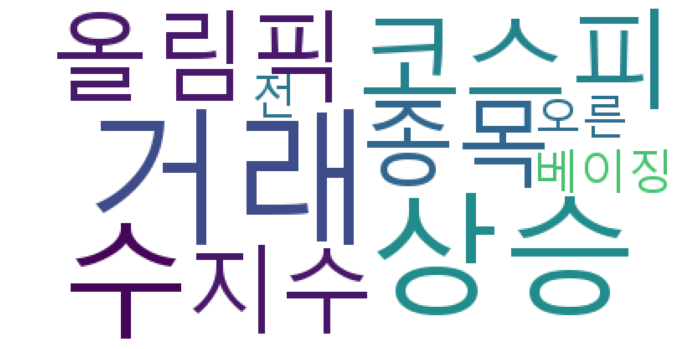

In [169]:
# 시각화
wordcloud = WordCloud(font_path='/home/crb123/from113/watson_ko/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(sliced_dict)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()